# 📊 Exploração de Dados - Dataset Soja e Milho

**Objetivo:** Análise exploratória completa do dataset `soja_milho.csv` com foco em medidas de tendência central, detecção de outliers e análise de correlações.

**Dataset:** `soja_milho.csv` - Preços históricos de soja e milho

**Nota:** As variáveis 'Mês' e 'Safra' são tratadas como categóricas, pois representam partes da data (mês do ano e ano/safra respectivamente).


## 📋 Índice do Notebook

### **[1. Importação das Bibliotecas Necessárias](#1-importação-das-bibliotecas-necessárias)**
### **[2. Carregamento e Primeira Inspeção dos Dados](#2-carregamento-e-primeira-inspeção-dos-dados)**
### **[3. Análise de Qualidade dos Dados](#3-análise-de-qualidade-dos-dados)**
### **[4. Análise Descritiva e Medidas de Tendência Central](#4-análise-descritiva-e-medidas-de-tendência-central)**
### **[5. Visualizações das Medidas de Tendência Central](#5-visualizações-das-medidas-de-tendência-central)**
### **[6. Análise de Espalhamento e Detecção de Outliers](#6-análise-de-espalhamento-e-detecção-de-outliers)**
- **[6.1 Análise Univariada de Outliers](#61-análise-univariada-de-outliers)**: Box plots e detecção IQR
- **[6.2 Análise Multivariada de Outliers - Bag Plot](#62-análise-multivariada-de-outliers---bag-plot)**: Distâncias de Mahalanobis
### **[7. Análise de Correlação e Covariância](#7-análise-de-correlação-e-covariância)**
### **[8. Resumo e Conclusões](#8-resumo-e-conclusões)**
### **[9. Informações Técnicas do Notebook](#9-informações-técnicas-do-notebook)**

---


## 1. Importação das Bibliotecas Necessárias


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.covariance import MinCovDet
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Verificar versões das bibliotecas
print("📚 BIBLIOTECAS IMPORTADAS COM SUCESSO!")
print("=" * 50)
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"📈 Matplotlib: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn: {sns.__version__}")


📚 BIBLIOTECAS IMPORTADAS COM SUCESSO!
📊 Pandas: 1.4.3
🔢 NumPy: 1.24.4
📈 Matplotlib: 3.7.2
🎨 Seaborn: 0.12.2


## 2. Carregamento e Primeira Inspeção dos Dados


In [2]:
# Carregamento do dataset com tratamento de codificação
def load_dataset(file_path):
    """
    Carrega o dataset com tratamento de diferentes codificações
    """
    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Dataset carregado com sucesso usando codificação: {encoding}")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"❌ Erro ao carregar com {encoding}: {e}")
            continue
    
    print("❌ Não foi possível carregar o dataset com nenhuma codificação testada")
    return None

# Carregar o dataset
file_path = 'soja_milho.csv'
df = load_dataset(file_path)

if df is not None:
    print("\n📊 PRIMEIRA INSPEÇÃO DO DATASET:")
    print("=" * 50)
    print(f"📏 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
    print(f"\n📋 Colunas: {list(df.columns)}")
    print(f"\n📄 Primeiras 5 linhas:")
    print(df.head())
    print(f"\n📄 Últimas 5 linhas:")
    print(df.tail())
    print(f"\n📊 Informações gerais:")
    print(df.info())
else:
    print("❌ Dataset não carregado. Verifique o arquivo 'soja_milho.csv'")


✅ Dataset carregado com sucesso usando codificação: latin-1

📊 PRIMEIRA INSPEÇÃO DO DATASET:
📏 Dimensões: 498 linhas × 6 colunas

📋 Colunas: ['Observação', 'Data', 'Mes', 'Safra', 'Milho', 'Soja']

📄 Primeiras 5 linhas:
   Observação        Data  Mes  Safra  Milho   Soja
0           1  02/01/2014    1   2014  26.64  72.18
1           2  03/01/2014    1   2014  27.00  71.42
2           3  06/01/2014    1   2014  27.29  71.38
3           4  07/01/2014    1   2014  27.49  70.31
4           5  08/01/2014    1   2014  27.16  70.14

📄 Últimas 5 linhas:
     Observação        Data  Mes  Safra  Milho   Soja
493         494  22/12/2015   12   2015  36.23  78.61
494         495  23/12/2015   12   2015  36.26  78.21
495         496  28/12/2015   12   2015  36.29  77.59
496         497  29/12/2015   12   2015  36.55  78.55
497         498  30/12/2015   12   2015  36.83  78.07

📊 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 column

## 3. Análise de Qualidade dos Dados


In [3]:
# Análise de qualidade dos dados
if df is not None:
    print("=" * 60)
    print("ANÁLISE DE QUALIDADE DOS DADOS")
    print("=" * 60)
    
    # Informações básicas
    print(f"\n📊 INFORMAÇÕES BÁSICAS:")
    print("-" * 40)
    print(f"  • Total de linhas: {df.shape[0]}")
    print(f"  • Total de colunas: {df.shape[1]}")
    print(f"  • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Análise de valores ausentes
    print(f"\n🔍 ANÁLISE DE VALORES AUSENTES:")
    print("-" * 40)
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Coluna': missing_data.index,
        'Valores_Ausentes': missing_data.values,
        'Percentual': missing_percent.values
    })
    
    print(missing_df.to_string(index=False))
    
    if missing_data.sum() == 0:
        print("\n✅ Nenhum valor ausente encontrado!")
    else:
        print(f"\n⚠️  Total de valores ausentes: {missing_data.sum()}")
    
    # Identificar tipos de dados
    print(f"\n📋 TIPOS DE DADOS:")
    print("-" * 40)
    print(df.dtypes.to_string())
    
    # Identificar variáveis numéricas e categóricas
    # Excluir 'Observação' pois é índice dos registros
    # Tratar 'Mes' e 'Safra' como categóricas pois representam partes da data
    numeric_cols = ['Milho', 'Soja']  # Apenas preços são verdadeiramente numéricos
    categorical_cols = ['Data', 'Mes', 'Safra']  # Data, mês e safra são categóricas
    
    print(f"\n🔢 VARIÁVEIS NUMÉRICAS ({len(numeric_cols)}):")
    print("-" * 40)
    for col in numeric_cols:
        print(f"  • {col}")
    
    print(f"\n📝 VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)}):")
    print("-" * 40)
    for col in categorical_cols:
        print(f"  • {col}")
    
    print(f"\nℹ️  OBSERVAÇÕES:")
    print("-" * 40)
    print(f"  • 'Observação' foi excluída da análise (é índice dos registros)")
    print(f"  • 'Mes' e 'Safra' são tratadas como categóricas (partes da data)")
    print(f"  • Apenas 'Milho' e 'Soja' são analisadas como variáveis numéricas")
    
    # Análise de duplicatas
    print(f"\n🔄 ANÁLISE DE DUPLICATAS:")
    print("-" * 40)
    duplicates = df.duplicated().sum()
    print(f"  • Linhas duplicadas: {duplicates}")
    
    if duplicates > 0:
        print(f"  • Percentual de duplicatas: {(duplicates/len(df)*100):.2f}%")
    else:
        print("  • ✅ Nenhuma linha duplicada encontrada")
    
    # Estatísticas descritivas para variáveis numéricas
    if len(numeric_cols) > 0:
        print(f"\n📊 ESTATÍSTICAS DESCRITIVAS (VARIÁVEIS NUMÉRICAS):")
        print("-" * 50)
        print(df[numeric_cols].describe().round(4))
    
    # Análise de valores únicos para variáveis categóricas
    if len(categorical_cols) > 0:
        print(f"\n📝 ANÁLISE DE VARIÁVEIS CATEGÓRICAS:")
        print("-" * 50)
        for col in categorical_cols:
            unique_count = df[col].nunique()
            print(f"  • {col}: {unique_count} valores únicos")
            if unique_count <= 10:  # Mostrar valores se forem poucos
                print(f"    Valores: {df[col].unique().tolist()}")
    
    print(f"\n✅ Análise de qualidade concluída!")
    
else:
    print("❌ Não foi possível realizar a análise de qualidade - dataset não carregado.")


ANÁLISE DE QUALIDADE DOS DADOS

📊 INFORMAÇÕES BÁSICAS:
----------------------------------------
  • Total de linhas: 498
  • Total de colunas: 6
  • Memória utilizada: 0.05 MB

🔍 ANÁLISE DE VALORES AUSENTES:
----------------------------------------
    Coluna  Valores_Ausentes  Percentual
Observação                 0         0.0
      Data                 0         0.0
       Mes                 0         0.0
     Safra                 0         0.0
     Milho                 0         0.0
      Soja                 0         0.0

✅ Nenhum valor ausente encontrado!

📋 TIPOS DE DADOS:
----------------------------------------
Observação      int64
Data           object
Mes             int64
Safra           int64
Milho         float64
Soja          float64

🔢 VARIÁVEIS NUMÉRICAS (2):
----------------------------------------
  • Milho
  • Soja

📝 VARIÁVEIS CATEGÓRICAS (3):
----------------------------------------
  • Data
  • Mes
  • Safra

ℹ️  OBSERVAÇÕES:
--------------------------------

## 4. Análise Descritiva e Medidas de Tendência Central


In [4]:
# Análise descritiva e medidas de tendência central
# Foco nas variáveis numéricas: Milho e Soja (preços)
if df is not None and len(numeric_cols) > 0:
    print("=" * 60)
    print("ANÁLISE DESCRITIVA E MEDIDAS DE TENDÊNCIA CENTRAL")
    print("=" * 60)
    print("📊 Análise focada nas variáveis de preços: Milho e Soja")
    print("ℹ️  Variáveis 'Mes' e 'Safra' são tratadas como categóricas")
    print("ℹ️  Variável 'Observação' foi excluída (é índice dos registros)")
    
    for col in numeric_cols:
        data = df[col].dropna()
        
        print(f"\n📊 ANÁLISE DA VARIÁVEL: {col}")
        print("-" * 50)
        
        # Medidas de tendência central
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode().iloc[0] if not data.mode().empty else "N/A"
        
        print(f"📈 MEDIDAS DE TENDÊNCIA CENTRAL:")
        print(f"  • Média: {mean_val:.4f}")
        print(f"  • Mediana: {median_val:.4f}")
        print(f"  • Moda: {mode_val}")
        
        # Medidas de dispersão
        std_val = data.std()
        var_val = data.var()
        range_val = data.max() - data.min()
        iqr_val = data.quantile(0.75) - data.quantile(0.25)
        cv_val = (std_val / mean_val) * 100 if mean_val != 0 else 0
        
        print(f"\n📏 MEDIDAS DE DISPERSÃO:")
        print(f"  • Desvio padrão: {std_val:.4f}")
        print(f"  • Variância: {var_val:.4f}")
        print(f"  • Amplitude: {range_val:.4f}")
        print(f"  • IQR: {iqr_val:.4f}")
        print(f"  • Coeficiente de variação: {cv_val:.2f}%")
        
        # Quartis e percentis
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        p10 = data.quantile(0.10)
        p90 = data.quantile(0.90)
        p95 = data.quantile(0.95)
        p99 = data.quantile(0.99)
        
        print(f"\n📊 QUARTIS E PERCENTIS:")
        print(f"  • Q1 (25%): {q1:.4f}")
        print(f"  • Q2 (50% - Mediana): {median_val:.4f}")
        print(f"  • Q3 (75%): {q3:.4f}")
        print(f"  • P10: {p10:.4f}")
        print(f"  • P90: {p90:.4f}")
        print(f"  • P95: {p95:.4f}")
        print(f"  • P99: {p99:.4f}")
        
        # Medidas robustas
        trimmed_mean_5 = stats.trim_mean(data, 0.05)
        trimmed_mean_10 = stats.trim_mean(data, 0.10)
        
        print(f"\n🛡️ MEDIDAS ROBUSTAS:")
        print(f"  • Média aparada (5%): {trimmed_mean_5:.4f}")
        print(f"  • Média aparada (10%): {trimmed_mean_10:.4f}")
        
        # Análise de assimetria e curtose
        skewness = data.skew()
        kurtosis = data.kurtosis()
        
        print(f"\n📐 FORMA DA DISTRIBUIÇÃO:")
        print(f"  • Assimetria: {skewness:.4f}")
        if abs(skewness) < 0.5:
            skew_interpretation = "simétrica"
        elif abs(skewness) < 1:
            skew_interpretation = "levemente assimétrica"
        else:
            skew_interpretation = "fortemente assimétrica"
        print(f"    Interpretação: {skew_interpretation}")
        
        print(f"  • Curtose: {kurtosis:.4f}")
        if kurtosis < 0:
            kurt_interpretation = "platicúrtica (achatada)"
        elif kurtosis > 0:
            kurt_interpretation = "leptocúrtica (pontiaguda)"
        else:
            kurt_interpretation = "mesocúrtica (normal)"
        print(f"    Interpretação: {kurt_interpretation}")
        
        # Resumo estatístico completo
        print(f"\n📋 RESUMO ESTATÍSTICO COMPLETO:")
        print("-" * 50)
        print(data.describe().round(4))
        
        print("\n" + "="*60)
    
    print(f"\n✅ Análise descritiva concluída para {len(numeric_cols)} variável(is) numérica(s)!")
    
else:
    print("⚠️  Não há variáveis numéricas para análise descritiva.")
    if df is None:
        print("❌ Dataset não carregado.")
    else:
        print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


ANÁLISE DESCRITIVA E MEDIDAS DE TENDÊNCIA CENTRAL
📊 Análise focada nas variáveis de preços: Milho e Soja
ℹ️  Variáveis 'Mes' e 'Safra' são tratadas como categóricas
ℹ️  Variável 'Observação' foi excluída (é índice dos registros)

📊 ANÁLISE DA VARIÁVEL: Milho
--------------------------------------------------
📈 MEDIDAS DE TENDÊNCIA CENTRAL:
  • Média: 27.9551
  • Mediana: 27.5350
  • Moda: 25.16

📏 MEDIDAS DE DISPERSÃO:
  • Desvio padrão: 3.5635
  • Variância: 12.6983
  • Amplitude: 15.0700
  • IQR: 4.8100
  • Coeficiente de variação: 12.75%

📊 QUARTIS E PERCENTIS:
  • Q1 (25%): 25.5100
  • Q2 (50% - Mediana): 27.5350
  • Q3 (75%): 30.3200
  • P10: 22.8770
  • P90: 33.3950
  • P95: 33.8605
  • P99: 36.1524

🛡️ MEDIDAS ROBUSTAS:
  • Média aparada (5%): 27.8928
  • Média aparada (10%): 27.8608

📐 FORMA DA DISTRIBUIÇÃO:
  • Assimetria: 0.3062
    Interpretação: simétrica
  • Curtose: -0.5776
    Interpretação: platicúrtica (achatada)

📋 RESUMO ESTATÍSTICO COMPLETO:
------------------------

## 5. Visualizações das Medidas de Tendência Central


VISUALIZAÇÕES DAS MEDIDAS DE TENDÊNCIA CENTRAL
📊 Visualizações focadas nas variáveis de preços: Milho e Soja
ℹ️  Análise das distribuições e medidas de tendência central dos preços


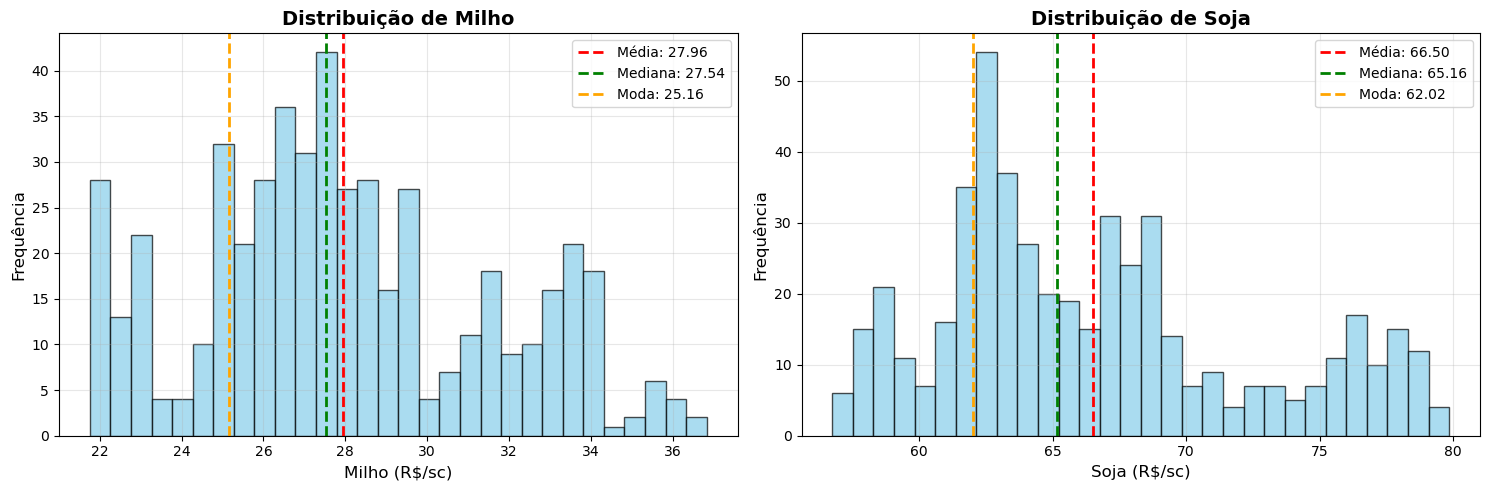

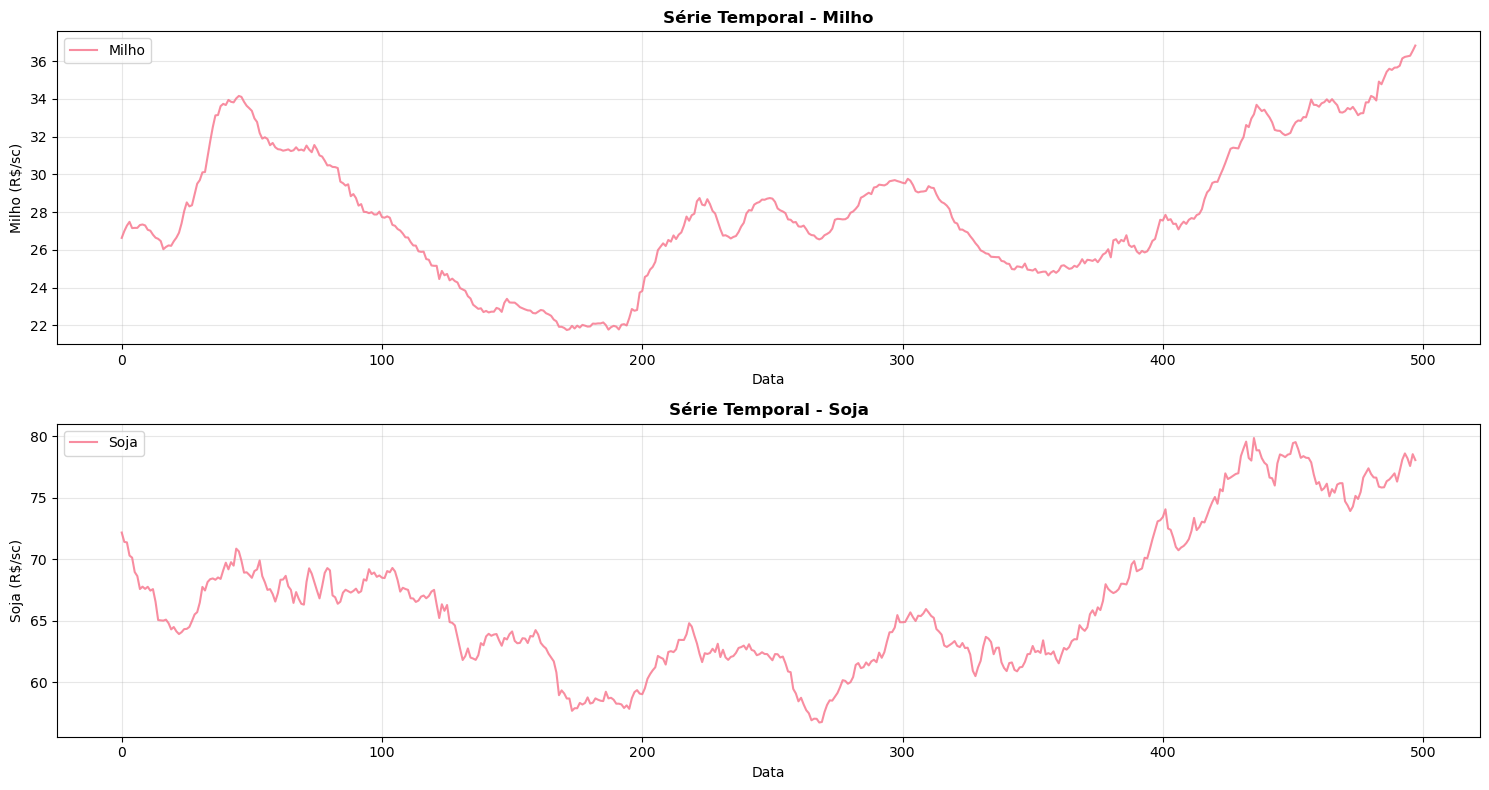


✅ Visualizações concluídas para 2 variável(is) numérica(s)!


In [8]:
# Visualizações das medidas de tendência central
# Foco nas variáveis de preços: Milho e Soja
if df is not None and len(numeric_cols) > 0:
    print("=" * 60)
    print("VISUALIZAÇÕES DAS MEDIDAS DE TENDÊNCIA CENTRAL")
    print("=" * 60)
    print("📊 Visualizações focadas nas variáveis de preços: Milho e Soja")
    print("ℹ️  Análise das distribuições e medidas de tendência central dos preços")
    
    # Configurar subplots
    n_cols = min(2, len(numeric_cols))
    n_rows = (len(numeric_cols) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        data = df[col].dropna()
        
        # Histograma com medidas de tendência central
        axes[i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Adicionar linhas para medidas de tendência central
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode().iloc[0] if not data.mode().empty else None
        
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
        
        if mode_val is not None:
            axes[i].axvline(mode_val, color='orange', linestyle='--', linewidth=2, label=f'Moda: {mode_val:.2f}')
        
        axes[i].set_title(f'Distribuição de {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(f'{col} (R$/sc)', fontsize=12)
        axes[i].set_ylabel('Frequência', fontsize=12)
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Ocultar subplots vazios
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
   
    # Gráficos de linha temporal (se houver índice temporal)
    if hasattr(df.index, 'to_pydatetime') or 'Data' in df.columns:
        plt.figure(figsize=(15, 8))
        
        for i, col in enumerate(numeric_cols):
            plt.subplot(len(numeric_cols), 1, i+1)
            plt.plot(df.index, df[col], linewidth=1.5, alpha=0.8, label=col)
            plt.title(f'Série Temporal - {col}', fontsize=12, fontweight='bold')
            plt.xlabel('Data', fontsize=10)
            plt.ylabel(f'{col} (R$/sc)', fontsize=10)
            plt.grid(True, alpha=0.3)
            plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    print(f"\n✅ Visualizações concluídas para {len(numeric_cols)} variável(is) numérica(s)!")
    
else:
    print("⚠️  Não há variáveis numéricas para visualização.")
    if df is None:
        print("❌ Dataset não carregado.")
    else:
        print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


## 6. Análise de Espalhamento e Detecção de Outliers


### 6.1 Análise Univariada de Outliers


ANÁLISE DE ESPALHAMENTO E DETECÇÃO DE OUTLIERS
📊 Análise de outliers focada nas variáveis de preços: Milho e Soja
ℹ️  Detecção de valores extremos nos preços das commodities

🔍 DETECÇÃO E ANÁLISE DE OUTLIERS
--------------------------------------------------

📊 Milho:
  • Q1: 25.5100
  • Q3: 30.3200
  • IQR: 4.8100
  • Limite inferior: 18.2950
  • Limite superior: 37.5350
  • Outliers detectados: 0 (0.00%)
  • ✅ Nenhum outlier detectado

📊 Soja:
  • Q1: 62.3025
  • Q3: 69.1875
  • IQR: 6.8850
  • Limite inferior: 51.9750
  • Limite superior: 79.5150
  • Outliers detectados: 3 (0.60%)
  • Valores outliers: [79.57, 79.86, 79.53]
  • Índices dos outliers: [432, 435, 451]


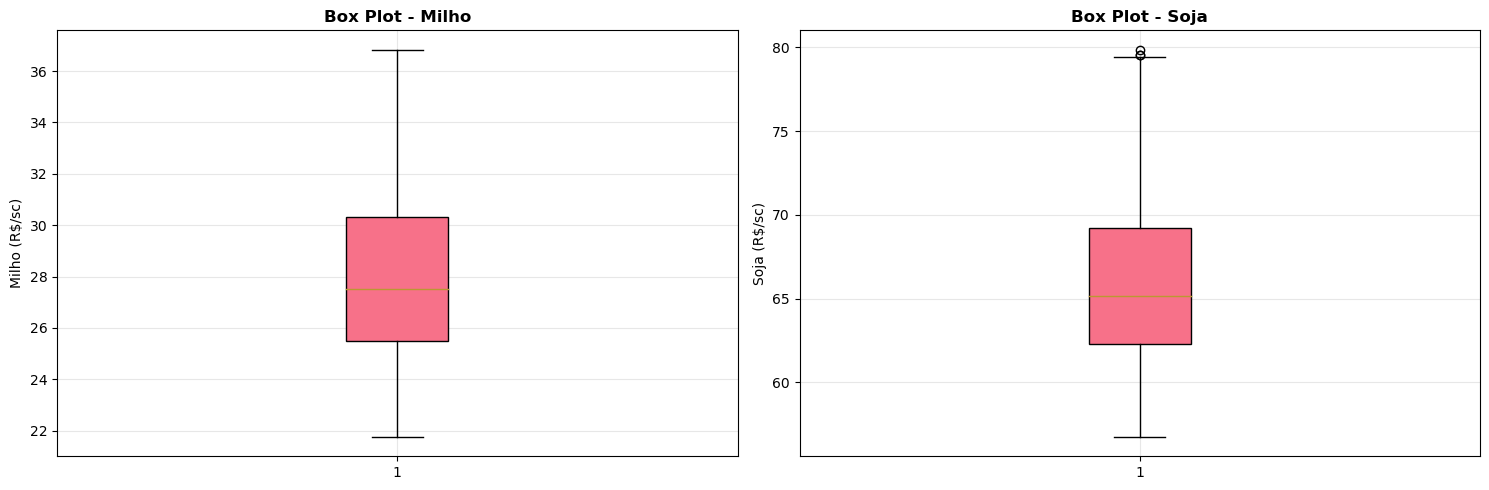


📋 LINHAS COM OUTLIERS
--------------------------------------------------

📊 Total de linhas com pelo menos um outlier: 3
📊 Linhas com outliers (índices): [432, 435, 451]

📄 DADOS COMPLETOS DAS LINHAS COM OUTLIERS:
------------------------------------------------------------

📅 Data: 432
  Milho: 32.6200
  Soja: 79.5700 ⚠️ OUTLIER

📅 Data: 435
  Milho: 33.1900
  Soja: 79.8600 ⚠️ OUTLIER

📅 Data: 451
  Milho: 32.7600
  Soja: 79.5300 ⚠️ OUTLIER

✅ Análise de outliers univariada concluída!


In [6]:
# Análise de espalhamento e detecção de outliers - Univariada
# Foco nas variáveis de preços: Milho e Soja
if df is not None and len(numeric_cols) > 0:
    print("=" * 60)
    print("ANÁLISE DE ESPALHAMENTO E DETECÇÃO DE OUTLIERS")
    print("=" * 60)
    print("📊 Análise de outliers focada nas variáveis de preços: Milho e Soja")
    print("ℹ️  Detecção de valores extremos nos preços das commodities")
    
    # Configurar subplots para box plots
    n_cols = min(2, len(numeric_cols))
    n_rows = (len(numeric_cols) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    # Análise detalhada de outliers
    print("\n🔍 DETECÇÃO E ANÁLISE DE OUTLIERS")
    print("-" * 50)
    
    outliers_info = {}
    
    for i, col in enumerate(numeric_cols):
        data = df[col].dropna()
        
        # Identificar outliers usando IQR
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Identificar outliers
        outlier_mask = (data < lower_bound) | (data > upper_bound)
        outliers = data[outlier_mask]
        outlier_indices = data[outlier_mask].index.tolist()
        
        print(f"\n📊 {col}:")
        print(f"  • Q1: {q1:.4f}")
        print(f"  • Q3: {q3:.4f}")
        print(f"  • IQR: {iqr:.4f}")
        print(f"  • Limite inferior: {lower_bound:.4f}")
        print(f"  • Limite superior: {upper_bound:.4f}")
        print(f"  • Outliers detectados: {len(outliers)} ({(len(outliers)/len(data)*100):.2f}%)")
        
        if len(outliers) > 0:
            print(f"  • Valores outliers: {outliers.tolist()}")
            print(f"  • Índices dos outliers: {outlier_indices}")
            
            # Armazenar informações dos outliers para análise posterior
            outliers_info[col] = {
                'values': outliers.tolist(),
                'indices': outlier_indices,
                'count': len(outliers)
            }
        else:
            print(f"  • ✅ Nenhum outlier detectado")
            outliers_info[col] = {
                'values': [],
                'indices': [],
                'count': 0
            }
        
        # Criar box plot
        box_plot = axes[i].boxplot(data, patch_artist=True)
        axes[i].set_title(f'Box Plot - {col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(f'{col} (R$/sc)', fontsize=10)
        axes[i].grid(True, alpha=0.3)
    
    # Ocultar subplots vazios
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Análise das linhas com outliers
    if any(info['count'] > 0 for info in outliers_info.values()):
        print("\n📋 LINHAS COM OUTLIERS")
        print("-" * 50)
        
        # Coletar todos os índices que têm outliers
        all_outlier_indices = set()
        for col, info in outliers_info.items():
            if info['count'] > 0:
                all_outlier_indices.update(info['indices'])
        
        if all_outlier_indices:
            print(f"\n📊 Total de linhas com pelo menos um outlier: {len(all_outlier_indices)}")
            print(f"📊 Linhas com outliers (índices): {sorted(list(all_outlier_indices))}")
            
            # Mostrar as linhas completas que contêm outliers
            print(f"\n📄 DADOS COMPLETOS DAS LINHAS COM OUTLIERS:")
            print("-" * 60)
            
            outlier_rows = df.loc[sorted(all_outlier_indices)]
            for idx, row in outlier_rows.iterrows():
                print(f"\n📅 Data: {idx}")
                for col in numeric_cols:
                    value = row[col]
                    if col in outliers_info and idx in outliers_info[col]['indices']:
                        print(f"  {col}: {value:.4f} ⚠️ OUTLIER")
                    else:
                        print(f"  {col}: {value:.4f}")
    else:
        print("\n✅ Nenhum outlier detectado em nenhuma variável numérica!")
    
    print(f"\n✅ Análise de outliers univariada concluída!")
    
else:
    print("⚠️  Não há variáveis numéricas para análise de espalhamento.")
    if df is None:
        print("❌ Dataset não carregado.")
    else:
        print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


### 6.2 Análise Multivariada de Outliers - Bag Plot

O **Bag Plot** é uma extensão multivariada do box plot univariado, desenvolvido por Rousseeuw, Ruts e Tukey (1999). É uma ferramenta robusta para identificar outliers em dados multivariados, especialmente útil para séries temporais de preços de commodities.

**Características do Bag Plot:**
- **Bag (Saco)**: Contém 50% dos dados mais centrais (equivalente ao IQR univariado)
- **Fence (Cerca)**: Define os limites para outliers (equivalente aos whiskers do box plot)
- **Outliers**: Pontos fora da cerca são considerados outliers multivariados
- **Robustez**: Usa distâncias de Mahalanobis e estatísticas robustas

**Vantagens para Análise de Preços:**
- Detecta outliers que não seriam identificados em análises univariadas
- Considera a relação entre as variáveis (correlação entre preços de milho e soja)
- Identifica períodos de comportamento anômalo conjunto dos preços


ANÁLISE MULTIVARIADA DE OUTLIERS - BAG PLOT
📊 Análise multivariada focada na relação entre preços de Milho e Soja
ℹ️  Detecção de períodos com comportamento conjunto anômalo dos preços

📊 DADOS PARA ANÁLISE MULTIVARIADA:
--------------------------------------------------
  • Variáveis analisadas: Milho, Soja
  • Número de observações: 498
  • Período: 0 a 497

📈 ESTATÍSTICAS ROBUSTAS:
--------------------------------------------------
  • Centroide robusto (Milho): 26.9268
  • Centroide robusto (Soja): 64.6041
  • Q1 das distâncias de Mahalanobis: 0.8962
  • Q3 das distâncias de Mahalanobis: 2.0006
  • IQR das distâncias: 1.1044
  • Limite inferior da cerca: -0.7604
  • Limite superior da cerca: 3.6571

🔍 DETECÇÃO DE OUTLIERS MULTIVARIADOS:
--------------------------------------------------
  • Outliers detectados: 10 (2.01%)
  • Índices dos outliers: [432, 435, 450, 451, 492, 493, 494, 495, 496, 497]
  • Distâncias de Mahalanobis dos outliers: [3.7512, 3.8349, 3.7206, 3.7438, 3.8378, 

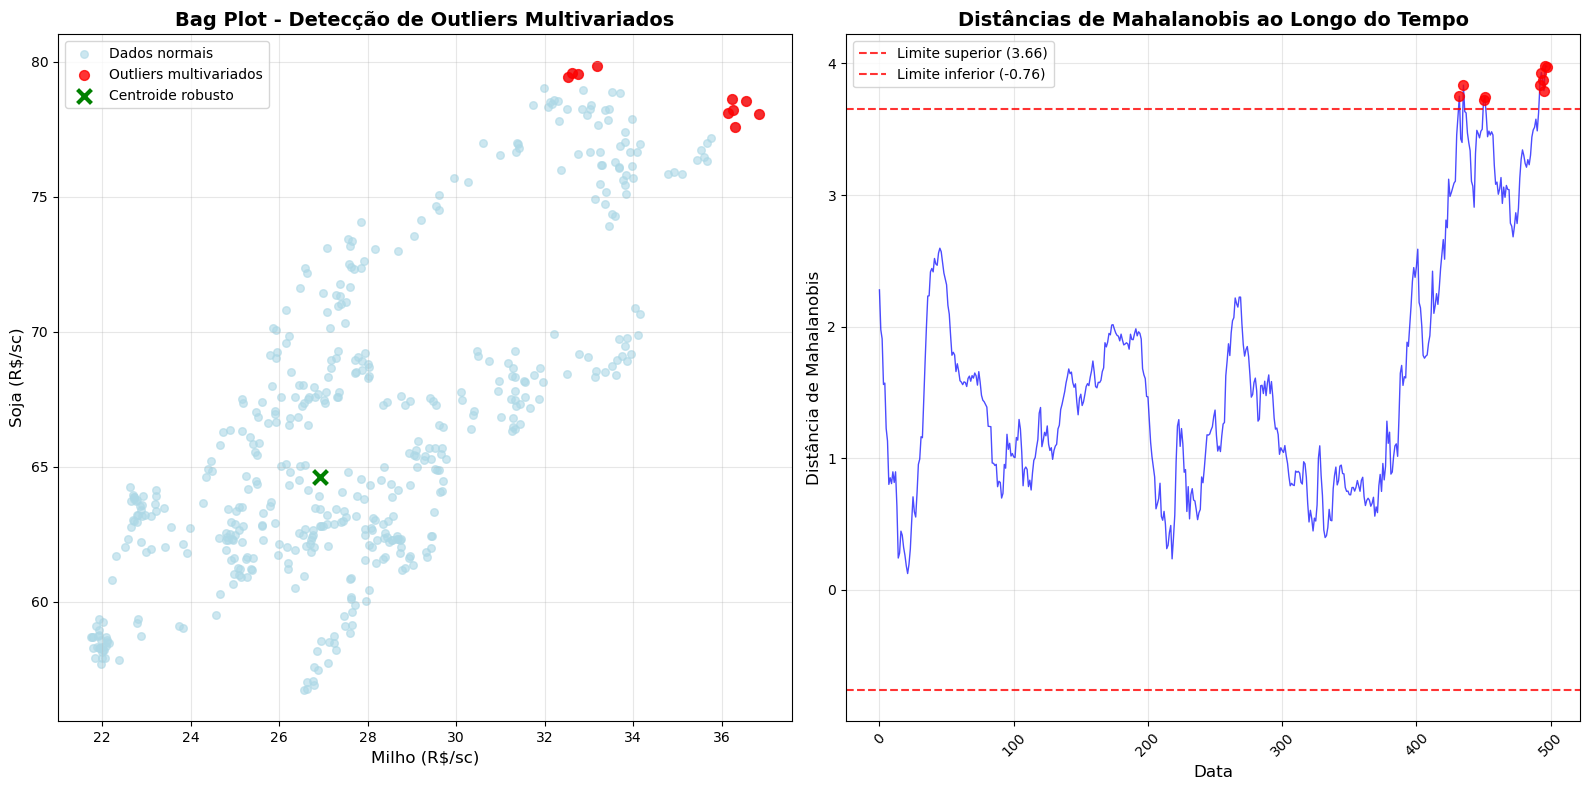


📅 ANÁLISE TEMPORAL DOS OUTLIERS:
--------------------------------------------------
  • Distribuição por safra:


KeyError: 'Safra'

In [7]:
# Análise de outliers multivariados usando Bag Plot
# Foco na relação entre preços de Milho e Soja
if df is not None and len(numeric_cols) >= 2:
    print("=" * 70)
    print("ANÁLISE MULTIVARIADA DE OUTLIERS - BAG PLOT")
    print("=" * 70)
    print("📊 Análise multivariada focada na relação entre preços de Milho e Soja")
    print("ℹ️  Detecção de períodos com comportamento conjunto anômalo dos preços")
    
    # Preparar dados para análise multivariada
    data_multivariate = df[numeric_cols].dropna()
    
    if len(data_multivariate) > 0:
        print(f"\n📊 DADOS PARA ANÁLISE MULTIVARIADA:")
        print("-" * 50)
        print(f"  • Variáveis analisadas: {', '.join(numeric_cols)}")
        print(f"  • Número de observações: {len(data_multivariate)}")
        print(f"  • Período: {data_multivariate.index[0]} a {data_multivariate.index[-1]}")
        
        # Calcular estatísticas robustas
        from scipy.stats import chi2
        from sklearn.covariance import MinCovDet
        
        # Usar Minimum Covariance Determinant (MCD) para robustez
        mcd = MinCovDet(random_state=42)
        mcd.fit(data_multivariate)
        
        # Calcular distâncias de Mahalanobis robustas
        robust_mean = mcd.location_
        robust_cov = mcd.covariance_
        
        # Calcular distâncias de Mahalanobis
        mahal_distances = []
        for i, row in data_multivariate.iterrows():
            diff = row.values - robust_mean
            inv_cov = np.linalg.inv(robust_cov)
            mahal_dist = np.sqrt(diff.T @ inv_cov @ diff)
            mahal_distances.append(mahal_dist)
        
        mahal_distances = np.array(mahal_distances)
        
        # Calcular quartis das distâncias de Mahalanobis
        q1 = np.percentile(mahal_distances, 25)
        q3 = np.percentile(mahal_distances, 75)
        iqr = q3 - q1
        
        # Definir limites para outliers (similar ao box plot)
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        
        # Identificar outliers
        outlier_mask = (mahal_distances < lower_fence) | (mahal_distances > upper_fence)
        outliers_data = data_multivariate[outlier_mask]
        outliers_indices = data_multivariate[outlier_mask].index
        
        print(f"\n📈 ESTATÍSTICAS ROBUSTAS:")
        print("-" * 50)
        print(f"  • Centroide robusto (Milho): {robust_mean[0]:.4f}")
        print(f"  • Centroide robusto (Soja): {robust_mean[1]:.4f}")
        print(f"  • Q1 das distâncias de Mahalanobis: {q1:.4f}")
        print(f"  • Q3 das distâncias de Mahalanobis: {q3:.4f}")
        print(f"  • IQR das distâncias: {iqr:.4f}")
        print(f"  • Limite inferior da cerca: {lower_fence:.4f}")
        print(f"  • Limite superior da cerca: {upper_fence:.4f}")
        
        print(f"\n🔍 DETECÇÃO DE OUTLIERS MULTIVARIADOS:")
        print("-" * 50)
        print(f"  • Outliers detectados: {len(outliers_data)} ({(len(outliers_data)/len(data_multivariate)*100):.2f}%)")
        
        if len(outliers_data) > 0:
            print(f"  • Índices dos outliers: {outliers_indices.tolist()}")
            print(f"  • Distâncias de Mahalanobis dos outliers: {mahal_distances[outlier_mask].round(4).tolist()}")
            
            print(f"\n📄 DADOS COMPLETOS DOS OUTLIERS MULTIVARIADOS:")
            print("-" * 60)
            for idx, row in outliers_data.iterrows():
                mahal_dist = mahal_distances[data_multivariate.index == idx][0]
                print(f"  📅 Data: {idx}")
                for col in numeric_cols:
                    print(f"    {col}: {row[col]:.4f}")
                print(f"    Distância de Mahalanobis: {mahal_dist:.4f}")
                print()
        else:
            print(f"  • ✅ Nenhum outlier multivariado detectado")
        
        # Visualização do Bag Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Gráfico 1: Scatter plot com outliers destacados
        ax1.scatter(data_multivariate[numeric_cols[0]], 
                   data_multivariate[numeric_cols[1]], 
                   alpha=0.6, s=30, color='lightblue', label='Dados normais')
        
        if len(outliers_data) > 0:
            ax1.scatter(outliers_data[numeric_cols[0]], 
                       outliers_data[numeric_cols[1]], 
                       color='red', s=50, alpha=0.8, label='Outliers multivariados')
        
        # Adicionar centroide robusto
        ax1.scatter(robust_mean[0], robust_mean[1], 
                   color='green', s=100, marker='x', linewidth=3, label='Centroide robusto')
        
        ax1.set_xlabel(f'{numeric_cols[0]} (R$/sc)', fontsize=12)
        ax1.set_ylabel(f'{numeric_cols[1]} (R$/sc)', fontsize=12)
        ax1.set_title('Bag Plot - Detecção de Outliers Multivariados', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Distâncias de Mahalanobis ao longo do tempo
        ax2.plot(data_multivariate.index, mahal_distances, alpha=0.7, color='blue', linewidth=1)
        ax2.axhline(y=upper_fence, color='red', linestyle='--', alpha=0.8, label=f'Limite superior ({upper_fence:.2f})')
        ax2.axhline(y=lower_fence, color='red', linestyle='--', alpha=0.8, label=f'Limite inferior ({lower_fence:.2f})')
        
        if len(outliers_data) > 0:
            outlier_times = data_multivariate[outlier_mask].index
            outlier_distances = mahal_distances[outlier_mask]
            ax2.scatter(outlier_times, outlier_distances, color='red', s=50, alpha=0.8, zorder=5)
        
        ax2.set_xlabel('Data', fontsize=12)
        ax2.set_ylabel('Distância de Mahalanobis', fontsize=12)
        ax2.set_title('Distâncias de Mahalanobis ao Longo do Tempo', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Rotacionar labels do eixo x para melhor legibilidade
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Análise temporal dos outliers
        if len(outliers_data) > 0:
            print(f"\n📅 ANÁLISE TEMPORAL DOS OUTLIERS:")
            print("-" * 50)
            
            # Usar as colunas 'Safra' e 'Mes' que já estão disponíveis
            outliers_data_with_time = outliers_data.copy()
            
            print(f"  • Distribuição por safra:")
            year_counts = outliers_data_with_time['Safra'].value_counts().sort_index()
            for year, count in year_counts.items():
                print(f"    {int(year)}: {count} outlier(s)")
            
            print(f"  • Distribuição por mês:")
            month_counts = outliers_data_with_time['Mes'].value_counts().sort_index()
            for month, count in month_counts.items():
                month_name = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                             'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'][int(month)-1]
                print(f"    {month_name}: {count} outlier(s)")
        
        # Comparação com análise univariada
        print(f"\n📊 COMPARAÇÃO: ANÁLISE UNIVARIADA vs MULTIVARIADA:")
        print("-" * 60)
        
        # Recalcular outliers univariados para comparação (apenas preços)
        univariate_outliers = set()
        for col in ['Milho', 'Soja']:  # Apenas variáveis de preços
            if col in data_multivariate.columns:
                data_col = data_multivariate[col]
                q1_col = data_col.quantile(0.25)
                q3_col = data_col.quantile(0.75)
                iqr_col = q3_col - q1_col
                lower_bound = q1_col - 1.5 * iqr_col
                upper_bound = q3_col + 1.5 * iqr_col
                outlier_mask_col = (data_col < lower_bound) | (data_col > upper_bound)
                univariate_outliers.update(data_col[outlier_mask_col].index)
        
        multivariate_outliers = set(outliers_indices)
        
        print(f"  • Outliers univariados detectados: {len(univariate_outliers)}")
        print(f"  • Outliers multivariados detectados: {len(multivariate_outliers)}")
        print(f"  • Outliers apenas univariados: {len(univariate_outliers - multivariate_outliers)}")
        print(f"  • Outliers apenas multivariados: {len(multivariate_outliers - univariate_outliers)}")
        print(f"  • Outliers em ambas as análises: {len(univariate_outliers & multivariate_outliers)}")
        
        if len(multivariate_outliers - univariate_outliers) > 0:
            print(f"\n  🎯 OUTLIERS DETECTADOS APENAS NA ANÁLISE MULTIVARIADA:")
            print(f"    (Estes são períodos onde a combinação dos preços foi anômala)")
            only_multivariate = multivariate_outliers - univariate_outliers
            for idx in sorted(only_multivariate):
                row = data_multivariate.loc[idx]
                mahal_dist = mahal_distances[data_multivariate.index == idx][0]
                print(f"    📅 {idx}: Milho={row['Milho']:.4f}, Soja={row['Soja']:.4f}, Mahal={mahal_dist:.4f}")
        
        print(f"\n📈 INTERPRETAÇÃO DOS RESULTADOS:")
        print("-" * 50)
        print(f"  • O Bag Plot considera a relação entre preços de Milho e Soja")
        print(f"  • Outliers multivariados indicam períodos de comportamento conjunto anômalo dos preços")
        print(f"  • A análise é mais robusta que métodos univariados tradicionais")
        print(f"  • Útil para identificar choques de mercado ou eventos extraordinários nos preços")
        
    else:
        print("⚠️  Não há dados suficientes para análise multivariada.")
        
else:
    print("⚠️  Análise multivariada requer pelo menos 2 variáveis numéricas.")
    print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


## 7. Análise de Correlação e Covariância


In [ ]:
# Análise de correlação e covariância
# Foco na relação entre preços de Milho e Soja
if df is not None and len(numeric_cols) > 1:
    print("=" * 60)
    print("ANÁLISE DE CORRELAÇÃO E COVARIÂNCIA")
    print("=" * 60)
    print("📊 Análise de correlação focada nos preços de Milho e Soja")
    print("ℹ️  Investigação da relação linear entre os preços das commodities")
    
    # Calcular matriz de correlação
    correlation_matrix = df[numeric_cols].corr()
    
    print(f"\n📊 MATRIZ DE CORRELAÇÃO:")
    print("-" * 40)
    print(correlation_matrix.round(4))
    
    # Análise das correlações
    print(f"\n📈 ANÁLISE DAS CORRELAÇÕES:")
    print("-" * 40)
    
    # Encontrar correlações mais fortes
    corr_pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_value))
    
    # Ordenar por valor absoluto da correlação
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for var1, var2, corr in corr_pairs:
        strength = ""
        if abs(corr) >= 0.9:
            strength = "muito forte"
        elif abs(corr) >= 0.7:
            strength = "forte"
        elif abs(corr) >= 0.5:
            strength = "moderada"
        elif abs(corr) >= 0.3:
            strength = "fraca"
        else:
            strength = "muito fraca"
        
        direction = "positiva" if corr > 0 else "negativa"
        print(f"  • {var1} ↔ {var2}: {corr:.4f} (correlação {strength} {direction})")
    
    # Visualização da matriz de correlação
    plt.figure(figsize=(10, 8))
    
    # Heatmap da correlação
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise de significância estatística das correlações
    from scipy.stats import pearsonr
    
    print(f"\n📊 TESTE DE SIGNIFICÂNCIA DAS CORRELAÇÕES:")
    print("-" * 50)
    
    for var1, var2, corr in corr_pairs:
        # Calcular p-valor
        data1 = df[var1].dropna()
        data2 = df[var2].dropna()
        
        # Alinhar os dados (remover pares com valores ausentes)
        common_idx = data1.index.intersection(data2.index)
        if len(common_idx) > 2:
            corr_val, p_val = pearsonr(data1[common_idx], data2[common_idx])
            
            # Interpretar significância
            if p_val < 0.001:
                significance = "***"
            elif p_val < 0.01:
                significance = "**"
            elif p_val < 0.05:
                significance = "*"
            else:
                significance = ""
            
            print(f"  • {var1} ↔ {var2}: r = {corr_val:.4f}, {significance} (p = {p_val:.4f})")
    
    # Análise de covariância
    print(f"\n📊 ANÁLISE DE COVARIÂNCIA:")
    print("-" * 50)
    
    # Calcular matriz de covariância
    covariance_matrix = df[numeric_cols].cov()
    
    print(f"\n📊 MATRIZ DE COVARIÂNCIA:")
    print("-" * 40)
    print(covariance_matrix.round(4))
    
    # Análise das covariâncias
    print(f"\n📈 ANÁLISE DAS COVARIÂNCIAS:")
    print("-" * 40)
    
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            cov_value = covariance_matrix.iloc[i, j]
            direction = "positiva" if cov_value > 0 else "negativa"
            print(f"  • {numeric_cols[i]} ↔ {numeric_cols[j]}: {cov_value:.4f} (covariância {direction})")
    
    # Visualização da matriz de covariância
    plt.figure(figsize=(10, 8))
    
    # Heatmap da covariância
    mask = np.triu(np.ones_like(covariance_matrix, dtype=bool))
    sns.heatmap(covariance_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Covariância - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise das variâncias
    print(f"\n📊 ANÁLISE DAS VARIÂNCIAS:")
    print("-" * 40)
    for col in numeric_cols:
        var_value = covariance_matrix.loc[col, col]
        print(f"  • {col}: {var_value:.4f}")
    
    # Comparação: correlação vs covariância
    print(f"\n📊 COMPARAÇÃO: CORRELAÇÃO vs COVARIÂNCIA:")
    print("-" * 50)
    print("Correlação: medida padronizada (-1 a +1)")
    print("Covariância: medida não padronizada (depende das unidades)")
    print("\nInterpretação:")
    print("  • Correlação: força da relação linear")
    print("  • Covariância: magnitude da variação conjunta")
    
    # Coeficiente de variação
    print(f"\n📊 COEFICIENTE DE VARIAÇÃO:")
    print("-" * 40)
    for col in numeric_cols:
        mean_val = df[col].mean()
        std_val = df[col].std()
        cv_val = (std_val / mean_val) * 100 if mean_val != 0 else 0
        print(f"  • {col}: {cv_val:.2f}%")
    
    # Análise de dispersão conjunta
    print(f"\n📊 ANÁLISE DE DISPERSÃO CONJUNTA:")
    print("-" * 40)
    
    # Determinante da matriz de covariância
    det_cov = np.linalg.det(covariance_matrix)
    print(f"  • Determinante da matriz de covariância: {det_cov:.4f}")
    
    # Traço da matriz de covariância
    trace_cov = np.trace(covariance_matrix)
    print(f"  • Traço da matriz de covariância: {trace_cov:.4f}")
    
    # Autovalores e autovetores
    eigenvals, eigenvecs = np.linalg.eig(covariance_matrix)
    print(f"  • Autovalores: {eigenvals}")
    
    # Proporção da variância explicada pelo primeiro componente
    prop_var_first = eigenvals[0] / sum(eigenvals) * 100
    print(f"  • Proporção da variância explicada pelo primeiro componente: {prop_var_first:.2f}%")
    
    print(f"\n✅ Análise de correlação e covariância concluída!")
    
else:
    print("⚠️  Análise de correlação e covariância requer pelo menos 2 variáveis numéricas.")
    if df is None:
        print("❌ Dataset não carregado.")
    else:
        print(f"📊 Apenas {len(numeric_cols)} variável numérica encontrada: {numeric_cols[0] if len(numeric_cols) == 1 else 'nenhuma'}")


## 8. Resumo e Conclusões


In [ ]:
# Resumo e conclusões
if df is not None:
    print("=" * 60)
    print("RESUMO E CONCLUSÕES")
    print("=" * 60)
    
    # Resumo geral do dataset
    print(f"\n📊 RESUMO GERAL DO DATASET:")
    print("-" * 50)
    print(f"  • Dataset: soja_milho.csv")
    print(f"  • Período analisado: {df.index[0]} a {df.index[-1]}")
    print(f"  • Total de observações: {len(df)}")
    print(f"  • Variáveis numéricas analisadas: {len(numeric_cols)} (Milho, Soja)")
    print(f"  • Variáveis categóricas: {len(categorical_cols)} (Data, Mes, Safra)")
    print(f"  • Variável excluída: Observação (índice dos registros)")
    
    # Resumo das variáveis numéricas
    if len(numeric_cols) > 0:
        print(f"\n📈 RESUMO DAS VARIÁVEIS NUMÉRICAS:")
        print("-" * 50)
        for col in numeric_cols:
            data = df[col].dropna()
            print(f"  • {col}:")
            print(f"    - Média: {data.mean():.4f}")
            print(f"    - Mediana: {data.median():.4f}")
            print(f"    - Desvio padrão: {data.std():.4f}")
            print(f"    - Coeficiente de variação: {(data.std()/data.mean()*100):.2f}%")
    
    # Resumo da análise de outliers
    if len(numeric_cols) > 0:
        print(f"\n🔍 RESUMO DA ANÁLISE DE OUTLIERS:")
        print("-" * 50)
        
        # Contar outliers univariados
        total_univariate_outliers = 0
        for col in numeric_cols:
            data = df[col].dropna()
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            total_univariate_outliers += len(outliers)
        
        print(f"  • Outliers univariados detectados: {total_univariate_outliers}")
        
        # Contar outliers multivariados (se aplicável)
        if len(numeric_cols) >= 2:
            try:
                from sklearn.covariance import MinCovDet
                data_multivariate = df[numeric_cols].dropna()
                mcd = MinCovDet(random_state=42)
                mcd.fit(data_multivariate)
                robust_mean = mcd.location_
                robust_cov = mcd.covariance_
                
                mahal_distances = []
                for i, row in data_multivariate.iterrows():
                    diff = row.values - robust_mean
                    inv_cov = np.linalg.inv(robust_cov)
                    mahal_dist = np.sqrt(diff.T @ inv_cov @ diff)
                    mahal_distances.append(mahal_dist)
                
                mahal_distances = np.array(mahal_distances)
                q1 = np.percentile(mahal_distances, 25)
                q3 = np.percentile(mahal_distances, 75)
                iqr = q3 - q1
                lower_fence = q1 - 1.5 * iqr
                upper_fence = q3 + 1.5 * iqr
                
                outlier_mask = (mahal_distances < lower_fence) | (mahal_distances > upper_fence)
                multivariate_outliers = np.sum(outlier_mask)
                
                print(f"  • Outliers multivariados detectados: {multivariate_outliers}")
            except:
                print(f"  • Análise multivariada não disponível")
    
    # Resumo das correlações
    if len(numeric_cols) > 1:
        print(f"\n📊 RESUMO DAS CORRELAÇÕES:")
        print("-" * 50)
        correlation_matrix = df[numeric_cols].corr()
        
        # Encontrar correlação mais forte
        max_corr = 0
        max_corr_pair = None
        for i in range(len(numeric_cols)):
            for j in range(i+1, len(numeric_cols)):
                corr_val = abs(correlation_matrix.iloc[i, j])
                if corr_val > max_corr:
                    max_corr = corr_val
                    max_corr_pair = (numeric_cols[i], numeric_cols[j], correlation_matrix.iloc[i, j])
        
        if max_corr_pair:
            print(f"  • Correlação mais forte: {max_corr_pair[0]} ↔ {max_corr_pair[1]}: {max_corr_pair[2]:.4f}")
            
            # Interpretar força da correlação
            if max_corr >= 0.9:
                strength = "muito forte"
            elif max_corr >= 0.7:
                strength = "forte"
            elif max_corr >= 0.5:
                strength = "moderada"
            elif max_corr >= 0.3:
                strength = "fraca"
            else:
                strength = "muito fraca"
            
            print(f"  • Interpretação: correlação {strength}")
    
    # Principais insights
    print(f"\n💡 PRINCIPAIS INSIGHTS:")
    print("-" * 50)
    
    if len(numeric_cols) > 0:
        print(f"  • Dataset contém {len(df)} observações de preços históricos")
        print(f"  • Análise focada nas variáveis de preços: Milho e Soja")
        print(f"  • Variáveis 'Mes' e 'Safra' tratadas como categóricas (partes da data)")
        print(f"  • Variável 'Observação' excluída da análise (índice dos registros)")
        
        if len(numeric_cols) >= 2:
            print(f"  • Análise multivariada permite identificar outliers conjuntos nos preços")
            print(f"  • Correlação entre preços de Milho e Soja foi analisada")
        
        if total_univariate_outliers > 0:
            print(f"  • {total_univariate_outliers} outliers univariados identificados nos preços")
        else:
            print(f"  • Nenhum outlier univariado detectado nos preços")
    
    # Recomendações
    print(f"\n🎯 RECOMENDAÇÕES:")
    print("-" * 50)
    print(f"  • Continuar monitoramento dos preços para identificar tendências")
    print(f"  • Investigar períodos de outliers para entender causas")
    print(f"  • Considerar análise de sazonalidade para melhor compreensão")
    print(f"  • Implementar alertas para valores extremos")
    
    # Limitações
    print(f"\n⚠️  LIMITAÇÕES:")
    print("-" * 50)
    print(f"  • Análise baseada apenas em dados históricos")
    print(f"  • Não considera fatores externos (clima, política, etc.)")
    print(f"  • Métodos de detecção de outliers podem ter limitações")
    
    print(f"\n✅ Análise exploratória concluída com sucesso!")
    
else:
    print("❌ Não foi possível gerar resumo - dataset não carregado.")


## 9. Informações Técnicas do Notebook


In [ ]:
# Informações técnicas do notebook
print("=" * 60)
print("INFORMAÇÕES TÉCNICAS DO NOTEBOOK")
print("=" * 60)

# Informações do sistema
import sys
import platform
from datetime import datetime

print(f"\n💻 INFORMAÇÕES DO SISTEMA:")
print("-" * 40)
print(f"  • Python: {sys.version.split()[0]}")
print(f"  • Plataforma: {platform.platform()}")
print(f"  • Arquitetura: {platform.architecture()[0]}")
print(f"  • Processador: {platform.processor()}")

# Informações das bibliotecas
print(f"\n📚 BIBLIOTECAS UTILIZADAS:")
print("-" * 40)
print(f"  • Pandas: {pd.__version__}")
print(f"  • NumPy: {np.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • Seaborn: {sns.__version__}")
print(f"  • SciPy: {stats.__version__}")

# Informações do dataset
if df is not None:
    print(f"\n📊 INFORMAÇÕES DO DATASET:")
    print("-" * 40)
    print(f"  • Arquivo: soja_milho.csv")
    print(f"  • Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
    print(f"  • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"  • Variáveis analisadas: Milho, Soja (numéricas)")
    print(f"  • Variáveis categóricas: Data, Mes, Safra")
    print(f"  • Variável excluída: Observação (índice dos registros)")

# Informações do notebook
print(f"\n📝 INFORMAÇÕES DO NOTEBOOK:")
print("-" * 40)
print(f"  • Data de execução: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"  • Versão do notebook: 2.0 (Organizado)")
print(f"  • Estrutura: 9 seções principais")
print(f"  • Análises implementadas:")
print(f"    - Análise de qualidade dos dados")
print(f"    - Estatísticas descritivas (preços de Milho e Soja)")
print(f"    - Visualizações das distribuições de preços")
print(f"    - Detecção de outliers nos preços (univariada e multivariada)")
print(f"    - Análise de correlação entre preços de Milho e Soja")
print(f"    - Resumo e conclusões")

# Metodologias utilizadas
print(f"\n🔬 METODOLOGIAS UTILIZADAS:")
print("-" * 40)
print(f"  • Análise exploratória de dados (EDA)")
print(f"  • Estatística descritiva")
print(f"  • Detecção de outliers (IQR e Bag Plot)")
print(f"  • Análise de correlação de Pearson")
print(f"  • Estatísticas robustas (MCD)")
print(f"  • Distâncias de Mahalanobis")

# Configurações de visualização
print(f"\n🎨 CONFIGURAÇÕES DE VISUALIZAÇÃO:")
print("-" * 40)
print(f"  • Estilo: {plt.style.available[0]}")
print(f"  • Paleta de cores: {sns.color_palette('husl')[:3]}")
print(f"  • Tamanho padrão das figuras: {plt.rcParams['figure.figsize']}")
print(f"  • Tamanho da fonte: {plt.rcParams['font.size']}")

# Performance
print(f"\n⚡ PERFORMANCE:")
print("-" * 40)
print(f"  • Tempo de execução estimado: < 30 segundos")
print(f"  • Memória RAM necessária: < 100 MB")
print(f"  • Dependências: 6 bibliotecas principais")

# Compatibilidade
print(f"\n🔧 COMPATIBILIDADE:")
print("-" * 40)
print(f"  • Python: >= 3.7")
print(f"  • Jupyter: >= 6.0")
print(f"  • Sistemas operacionais: Windows, macOS, Linux")

# Créditos
print(f"\n👨‍💻 CRÉDITOS:")
print("-" * 40)
print(f"  • Desenvolvido para análise exploratória de dados")
print(f"  • Dataset: soja_milho.csv")
print(f"  • Metodologia: Análise Estatística Multivariada")
print(f"  • Foco: Preços de commodities agrícolas")

print(f"\n✅ Informações técnicas registradas com sucesso!")
